Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans



loading the dataset

In [2]:
url = '/content/diabetes.csv'
data = pd.read_csv(url)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

checking for the missing values

In [4]:
missing_values = data.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


no missing values that mean the dataset is good

In [6]:
data_types = data.dtypes
data_types

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Transformation**<br>
-Feature Scaling to make sure every feature has same weight

In [12]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[features]), columns=features)



-Principal Component Analysis (PCA) for Dimensionality Reduction

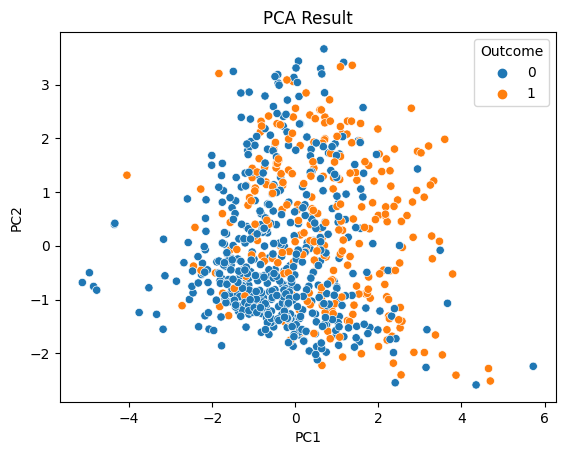

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df = pd.concat([pc_df, data['Outcome']], axis=1)

sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='Outcome')
plt.title('PCA Result')
plt.show()


**Data Mining**<br>
-KMeans Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


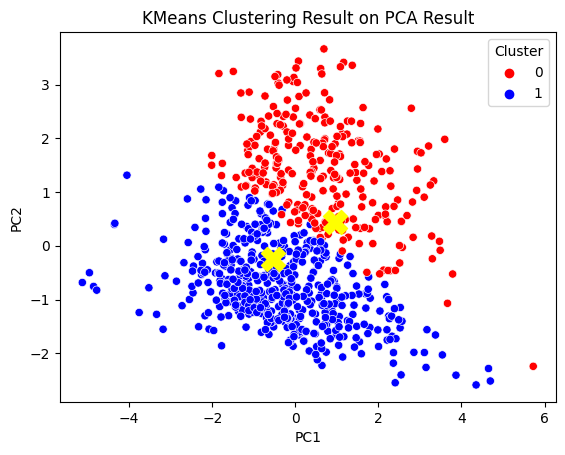

In [14]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(data_scaled[features])

# Add clusters to PCA df for visualization
pc_df['Cluster'] = clusters

# Visualize Clusters in PCA 2D space
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='Cluster', palette=['red', 'blue'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='X')
plt.title('KMeans Clustering Result on PCA Result')
plt.show()


-Classification

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



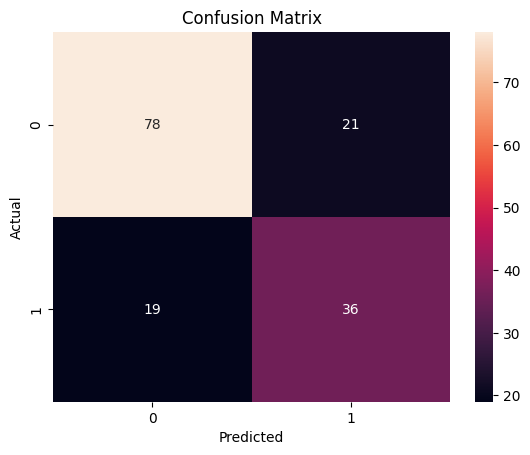

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data_scaled[features], data['Outcome'], test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Evaluation**

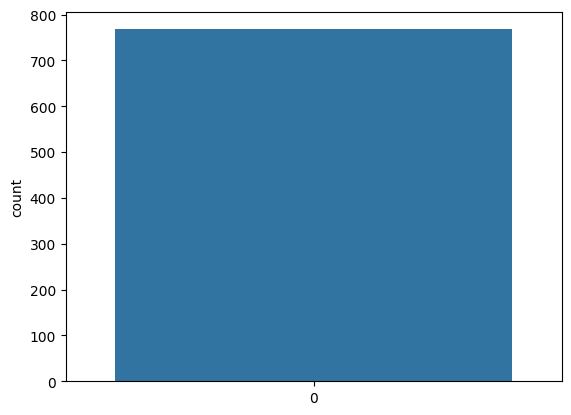

In [17]:
sns.countplot(data['Outcome'])
plt.show()


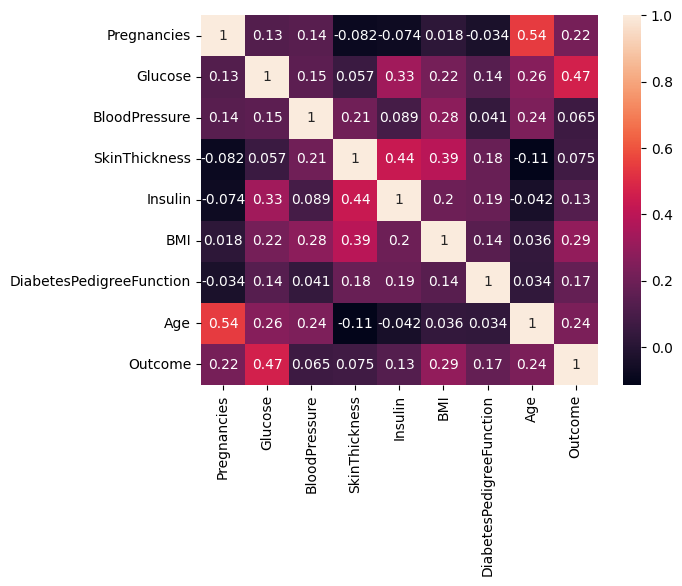

In [18]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()
